In [ ]:
#!pip install selenium

In [ ]:
#!pip install bs4

In [ ]:
#!pip install pandas

In [ ]:
#!pip install requests

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from datetime import datetime
import random

pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

In [2]:
# Temel URL
base_url = "https://www.felgenshop.de/reifen/#!reifenfilter/breite={}/hoehe={}/zoll={}/saison={}/sortiert=empfehlung"


In [3]:
# Parametre listesi
parameters_list = [
    {"width": 195, "height": 50, "diameter": 15, "season": "winter"}
]


In [4]:
parameters = parameters_list[0]
parameters

{'width': 195, 'height': 50, 'diameter': 15, 'season': 'winter'}

In [5]:
parameters["width"]

195

In [6]:
# URL'yi oluşturun
url = base_url.format(parameters["width"], parameters["height"], parameters["diameter"], parameters["season"])
print(url)

https://www.felgenshop.de/reifen/#!reifenfilter/breite=195/hoehe=50/zoll=15/saison=winter/sortiert=empfehlung


In [7]:
requests.get(url)

html_data  = requests.get(url).text 

soup = BeautifulSoup(html_data,"html.parser")


<!DOCTYPE html>
<html>
 <head>
  <base href="https://www.felgenshop.de/"/>
  <link href="https://www.felgenshop.de/source/skin/default/img/icon/favicon_felgenshop.ico" rel="shortcut icon" type="image/x-icon"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="de-de" http-equiv="content-language"/>
  <meta content="no-cache" http-equiv="cache-control"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
  <meta content="u3OCwjptvmqICOeDty31bT2sT3Ix1lj9toIfbCTcQBU" name="google-site-verification">
   <meta content="Vg69M9l0gdG3TVR5sKMVj_8IB5J7Mwro879jCJ506_w" name="google-site-verification"/>
   <meta content="3fc6b197e03299c9919a4ea1c79a827b" name="p:domain_verify"/>
   <meta content="INDEX,FOLLOW" name="robots"/>
   <meta content="Reifen bekannter Marken für PKWs mit Alufelgen als Komplettrad oder ohne Felgen online günstig kaufen. Sommerreifen, Winterreifen, Allwetterreifen / Ganzjahresreifen
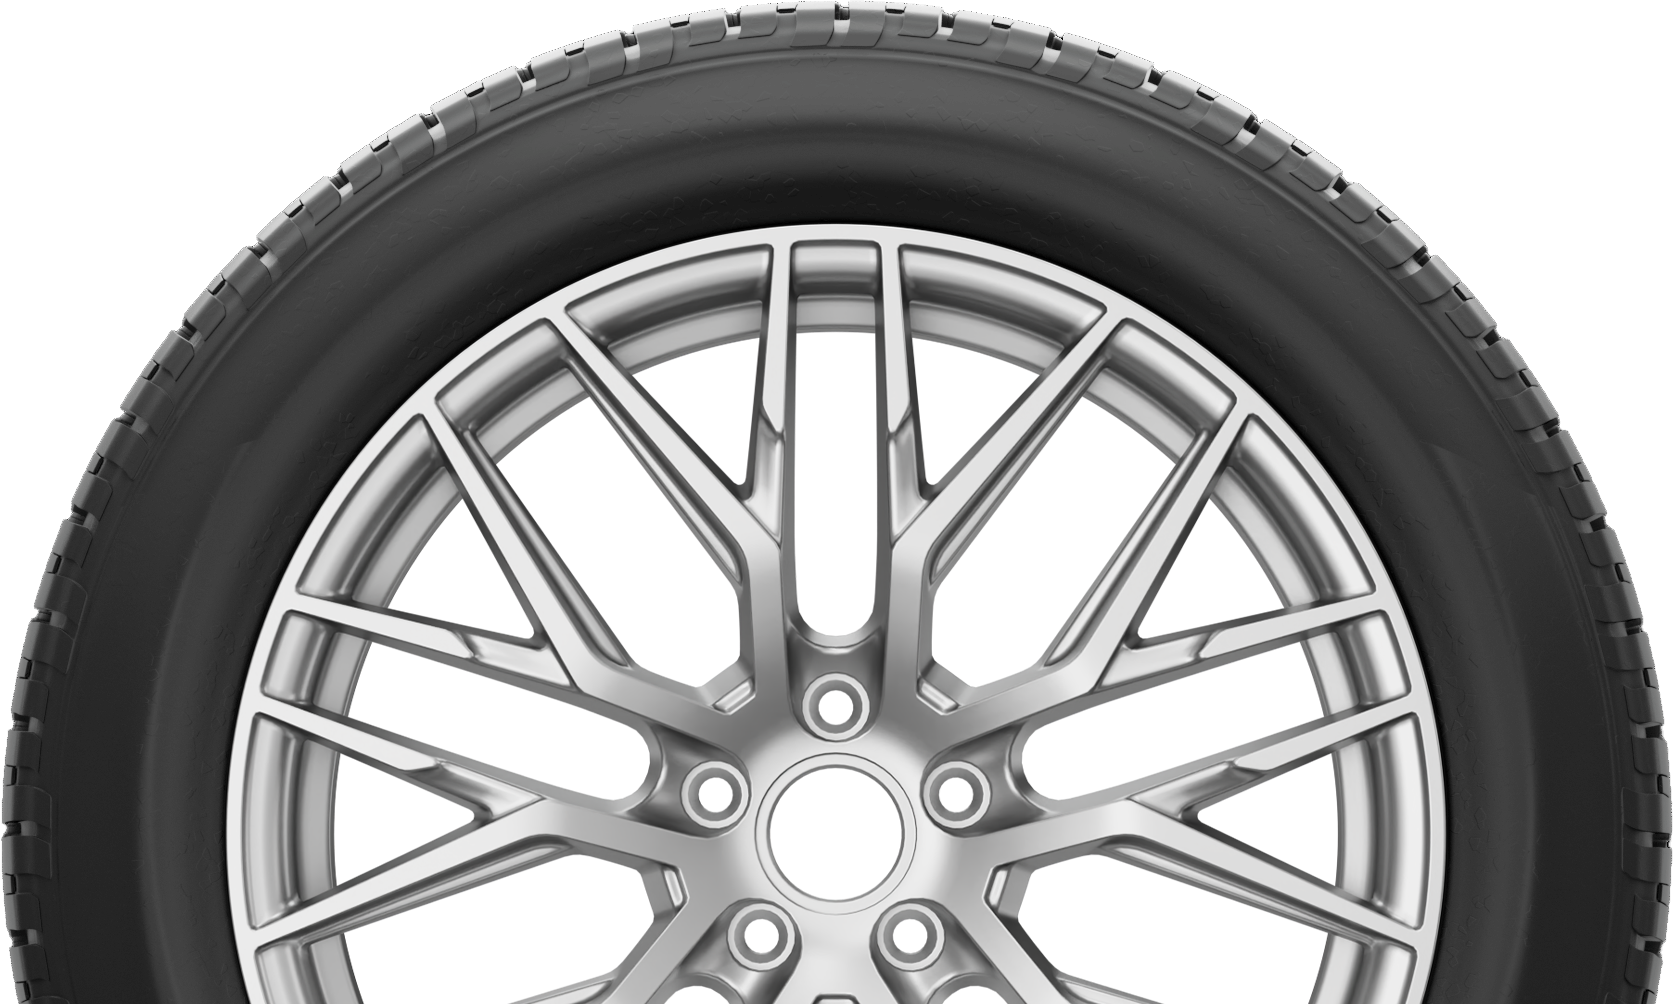

In [8]:
print(soup.prettify())

In [9]:
soup.find_all('div', class_='row tire-box-desktop')

[<div class="row tire-box-desktop">
 <div class="col-xs-3">
 <div class="row">
 <div class="col-xs-12">
 <img alt="Testreifen" class="tire-image" src="/source/skin/default/img/fsv2/reifen/testreifen.png">
 </img></div>
 </div>
 </div>
 <div class="col-xs-3">
 <div class="row">
 <div class="col-xs-12">
 <img alt="Reifenhersteller" class="tire-manufacturer-logo" src="/source/skin/default/img/fsv2/reifen/testhersteller.png">
 </img></div>
 <div class="col-xs-12 tire-article-name-margin">
 <span class="tire-article-name">Artikelname</span>
 </div>
 <div class="col-xs-12 tire-article-size-margin">
 <span class="tire-article-size">205/55 R16 91Y</span>
 </div>
 <div class="col-xs-12 tire-article-type-margin d-flex align-items-center">
 
 <span class="tire-article-type">Winterreifen</span>
 </img></div>
 </div>
 </div>
 <div class="col-xs-4">
 <div class="row">
 <div class="col-xs-5">
 <span class="tire-article-loadindex-title">Traglast:</span>
 <span class="tire-article-loadindex"><div class

In [ ]:
len(soup.find_all('div', class_='row tire-box-desktop'))

In [10]:
tire_boxes = soup.find_all('div', class_='row tire-box-desktop')

In [11]:
tire_box = tire_boxes[0]
tire_box

<div class="row tire-box-desktop">
<div class="col-xs-3">
<div class="row">
<div class="col-xs-12">
<img alt="Testreifen" class="tire-image" src="/source/skin/default/img/fsv2/reifen/testreifen.png">
</img></div>
</div>
</div>
<div class="col-xs-3">
<div class="row">
<div class="col-xs-12">
<img alt="Reifenhersteller" class="tire-manufacturer-logo" src="/source/skin/default/img/fsv2/reifen/testhersteller.png">
</img></div>
<div class="col-xs-12 tire-article-name-margin">
<span class="tire-article-name">Artikelname</span>
</div>
<div class="col-xs-12 tire-article-size-margin">
<span class="tire-article-size">205/55 R16 91Y</span>
</div>
<div class="col-xs-12 tire-article-type-margin d-flex align-items-center">

<span class="tire-article-type">Winterreifen</span>
</img></div>
</div>
</div>
<div class="col-xs-4">
<div class="row">
<div class="col-xs-5">
<span class="tire-article-loadindex-title">Traglast:</span>
<span class="tire-article-loadindex"><div class="bold">91</div> (690 kg)</spa

In [12]:
article_size = tire_box.find('span', class_='tire-article-size')
article_name = tire_box.find('span', class_='tire-article-name')
load_index = tire_box.find('span', class_='tire-article-loadindex')
speed_index = tire_box.find('span', class_='tire-article-speedindex')
article_price = tire_box.find('span', class_='tire-buy-button-article-price')
Nasshaftung = tire_box.find('div', class_='wet-grip detail').find('span', class_='cube')
Kraftstoffeffizienz = tire_box.find('div', class_='fuel detail').find('span', class_='cube')
Rollgeraeusch = tire_box.find('div', class_='noise detail').find('span', class_='cube')
total_price = tire_box.find('span', class_='tire-buy-button-total-price')

In [13]:
article_size

<span class="tire-article-size">205/55 R16 91Y</span>

In [14]:
article_name

<span class="tire-article-name">Artikelname</span>

In [15]:
article_price

<span class="tire-buy-button-article-price">345,67 €</span>

In [16]:
Nasshaftung

<span class="cube">1</span>

In [17]:
total_price

<span class="tire-buy-button-total-price">(1234,56 €)</span>

In [18]:
# Boş bir liste oluşturun
tires_data = []

In [19]:
# Gerekli bilgileri çıkarma ve listeye ekleme
for tire_box in tire_boxes:
    article_size = tire_box.find('span', class_='tire-article-size')
    article_name = tire_box.find('span', class_='tire-article-name')
    load_index = tire_box.find('span', class_='tire-article-loadindex')
    speed_index = tire_box.find('span', class_='tire-article-speedindex')
    article_price = tire_box.find('span', class_='tire-buy-button-article-price')
    Nasshaftung = tire_box.find('div', class_='wet-grip detail').find('span', class_='cube')
    Kraftstoffeffizienz = tire_box.find('div', class_='fuel detail').find('span', class_='cube')
    Rollgeraeusch = tire_box.find('div', class_='noise detail').find('span', class_='cube')
    total_price = tire_box.find('span', class_='tire-buy-button-total-price')
    
    tires_data.append({
        'Article Size': article_size.text.strip() if article_size else "",
        'Article Name': article_name.text.strip() if article_name else "",
        'Load Index': load_index.text.strip() if load_index else "",
        'Speed Index': speed_index.text.strip() if speed_index else "",
        'Article Price': article_price.text.strip() if article_price else "",
        'Nasshaftung' : Nasshaftung.text.strip() if Nasshaftung else "",
        'Kraftstoffeffizienz' : Kraftstoffeffizienz.text.strip() if Kraftstoffeffizienz else "",
        'Rollgeraeusch' : Rollgeraeusch.text.strip() if Rollgeraeusch else "",
        'Total Price': total_price.text.strip() if total_price else ""
    })

In [20]:
tires_data

[{'Article Size': '205/55 R16 91Y',
  'Article Name': 'Artikelname',
  'Load Index': '91 (690 kg)',
  'Speed Index': 'Y (max. 240 km/h)',
  'Article Price': '345,67 €',
  'Nasshaftung': '1',
  'Kraftstoffeffizienz': '2',
  'Rollgeraeusch': '3',
  'Total Price': '(1234,56 €)'},
 {'Article Size': '205/55 R16 91Y',
  'Article Name': 'Artikelname',
  'Load Index': '91 (690 kg)',
  'Speed Index': 'Y (max. 240 km/h)',
  'Article Price': '345,67 €',
  'Nasshaftung': '1',
  'Kraftstoffeffizienz': '2',
  'Rollgeraeusch': '3',
  'Total Price': '(1234,56 €)'},
 {'Article Size': '205/55 R16 91Y',
  'Article Name': 'Artikelname',
  'Load Index': '91 (690 kg)',
  'Speed Index': 'Y (max. 240 km/h)',
  'Article Price': '345,67 €',
  'Nasshaftung': '1',
  'Kraftstoffeffizienz': '2',
  'Rollgeraeusch': '3',
  'Total Price': '(1234,56 €)'},
 {'Article Size': '205/55 R16 91Y',
  'Article Name': 'Artikelname',
  'Load Index': '91 (690 kg)',
  'Speed Index': 'Y (max. 240 km/h)',
  'Article Price': '345,67 €

In [21]:
# Pandas DataFrame oluşturma
df = pd.DataFrame(tires_data)
df

Article Size Article Name   Load Index        Speed Index Article Price  \
0  205/55 R16 91Y  Artikelname  91 (690 kg)  Y (max. 240 km/h)      345,67 €   
1  205/55 R16 91Y  Artikelname  91 (690 kg)  Y (max. 240 km/h)      345,67 €   
2  205/55 R16 91Y  Artikelname  91 (690 kg)  Y (max. 240 km/h)      345,67 €   
3  205/55 R16 91Y  Artikelname  91 (690 kg)  Y (max. 240 km/h)      345,67 €   
4  205/55 R16 91Y  Artikelname  91 (690 kg)  Y (max. 240 km/h)      345,67 €   

  Nasshaftung Kraftstoffeffizienz Rollgeraeusch  Total Price  
0           1                   2             3  (1234,56 €)  
1           1                   2             3  (1234,56 €)  
2           1                   2             3  (1234,56 €)  
3           1                   2             3  (1234,56 €)  
4           1                   2             3  (1234,56 €)


# Experiment with Selenium

In [22]:
# Selenium WebDriver'ı başlatma
driver = webdriver.Chrome()

In [23]:
rnd_scnd = random.randint(30, 60)
rnd_scnd

38

In [24]:
# Web sayfasını açma
driver.get(url)
# Sayfanın tam yüklenmesini bekleyin (random 10-20 saniye süreyle)
rnd_scnd = random.randint(30, 60)
wait = WebDriverWait(driver, rnd_scnd)
#wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'row tire-box-desktop')))

In [25]:
# Sayfanın HTML içeriğini alın
html_code = driver.page_source

<html><head>
  <base href="https://www.felgenshop.de/">
        <style data-tippy-stylesheet="">.tippy-box[data-animation=fade][data-state=hidden]{opacity:0}[data-tippy-root]{max-width:calc(100vw - 10px)}.tippy-box{position:relative;background-color:#333;color:#fff;border-radius:4px;font-size:14px;line-height:1.4;white-space:normal;outline:0;transition-property:transform,visibility,opacity}.tippy-box[data-placement^=top]>.tippy-arrow{bottom:0}.tippy-box[data-placement^=top]>.tippy-arrow:before{bottom:-7px;left:0;border-width:8px 8px 0;border-top-color:initial;transform-origin:center top}.tippy-box[data-placement^=bottom]>.tippy-arrow{top:0}.tippy-box[data-placement^=bottom]>.tippy-arrow:before{top:-7px;left:0;border-width:0 8px 8px;border-bottom-color:initial;transform-origin:center bottom}.tippy-box[data-placement^=left]>.tippy-arrow{right:0}.tippy-box[data-placement^=left]>.tippy-arrow:before{border-width:8px 0 8px 8px;border-left-color:initial;right:-7px;transform-origin:center left
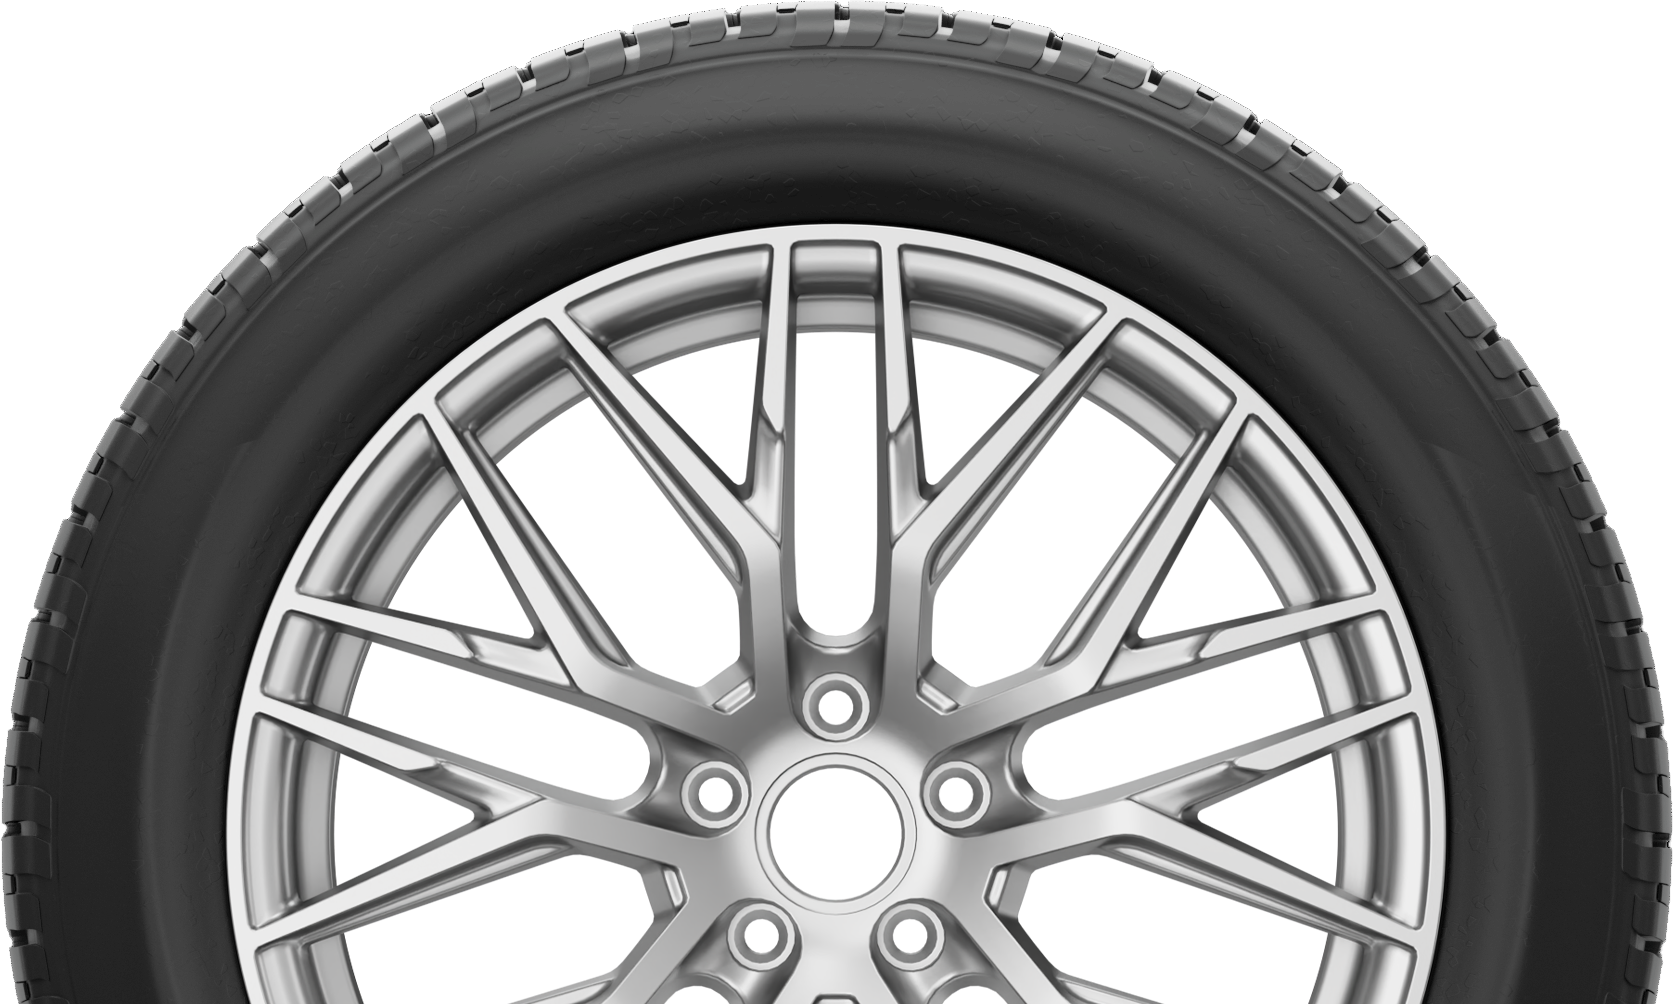

In [26]:
print(html_code)

In [27]:
# BeautifulSoup nesnesi oluşturma
soup = BeautifulSoup(html_code, 'html.parser')

<html>
 <head>
  <base href="https://www.felgenshop.de/"/>
  <style data-tippy-stylesheet="">
   .tippy-box[data-animation=fade][data-state=hidden]{opacity:0}[data-tippy-root]{max-width:calc(100vw - 10px)}.tippy-box{position:relative;background-color:#333;color:#fff;border-radius:4px;font-size:14px;line-height:1.4;white-space:normal;outline:0;transition-property:transform,visibility,opacity}.tippy-box[data-placement^=top]>.tippy-arrow{bottom:0}.tippy-box[data-placement^=top]>.tippy-arrow:before{bottom:-7px;left:0;border-width:8px 8px 0;border-top-color:initial;transform-origin:center top}.tippy-box[data-placement^=bottom]>.tippy-arrow{top:0}.tippy-box[data-placement^=bottom]>.tippy-arrow:before{top:-7px;left:0;border-width:0 8px 8px;border-bottom-color:initial;transform-origin:center bottom}.tippy-box[data-placement^=left]>.tippy-arrow{right:0}.tippy-box[data-placement^=left]>.tippy-arrow:before{border-width:8px 0 8px 8px;border-left-color:initial;right:-7px;transform-origin:center lef
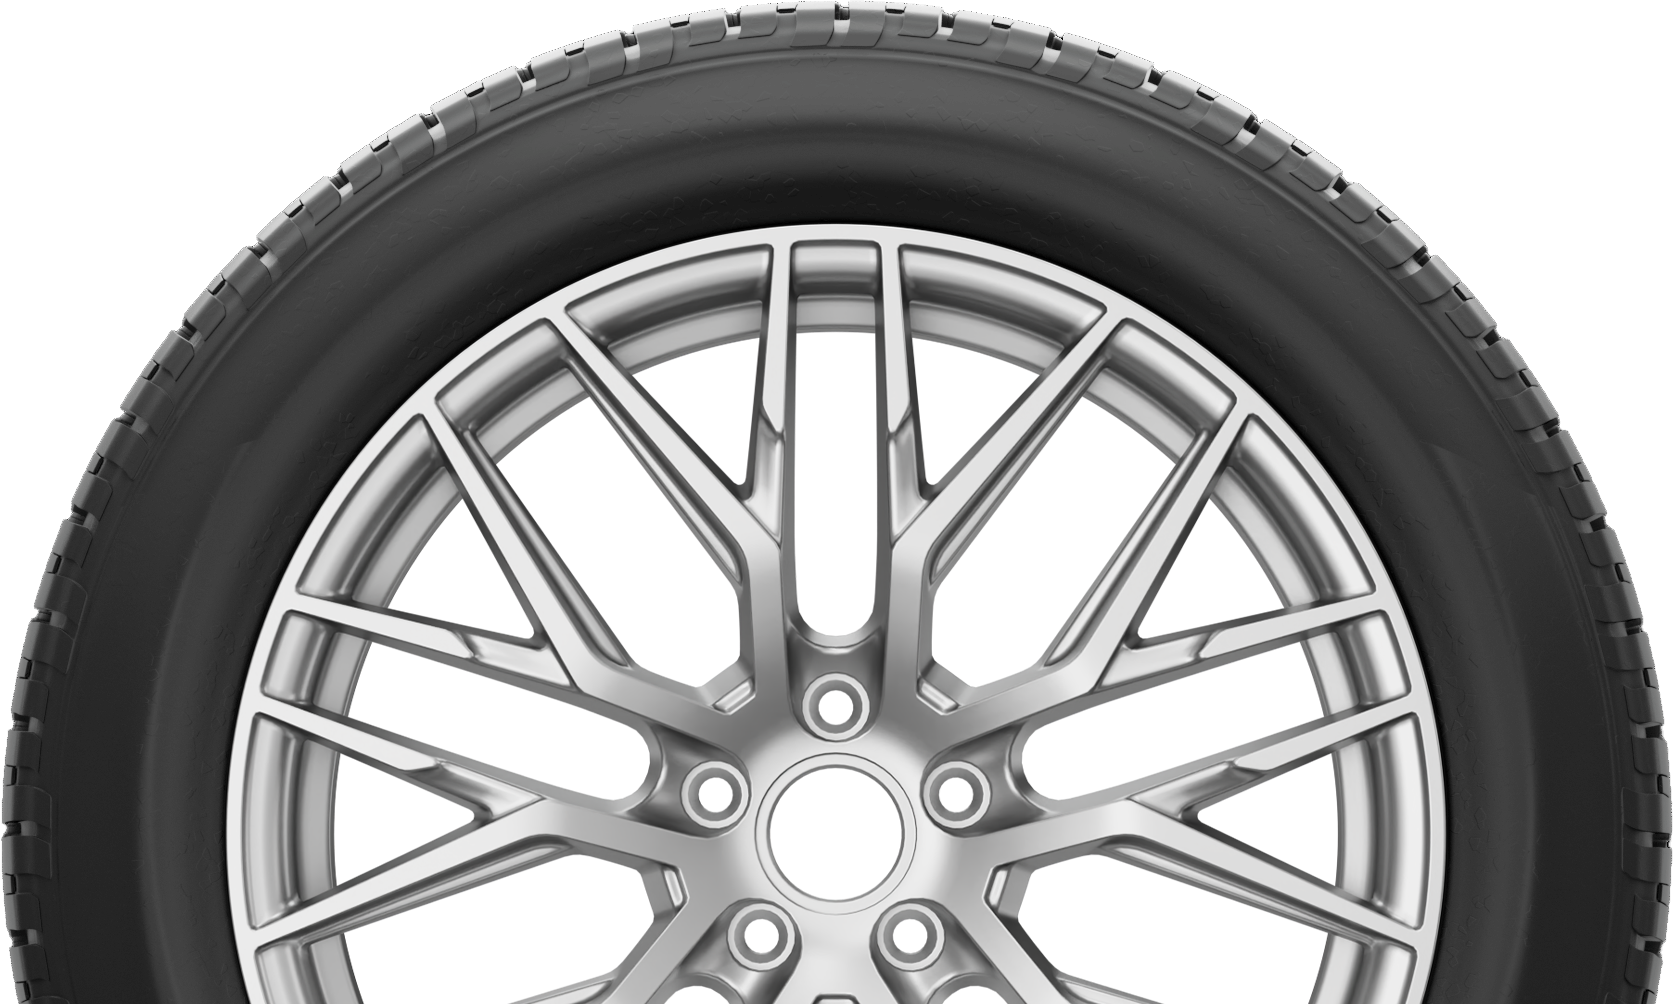

In [28]:
print(soup.prettify())

In [29]:
len(soup.find_all('div', class_='row tire-box-desktop'))

25

In [30]:
tire_boxes = soup.find_all('div', class_='row tire-box-desktop')

In [31]:
print(tire_boxes)

[<div class="row tire-box-desktop">
<a class="d-flex align-items-center height-100-percent tire-article-link" href="https://www.felgenshop.de/reifen/4019238043051-continental-winter-contact-ts-870-195-50-R15-82T-winterreifen/">
<div class="col-xs-3 col-md-2 col-lg-3 col-xl-4">
<div class="row">
<div class="col-xs-12">
<img alt="CONTINENTAL WINTER CONTACT TS 870" class="tire-image" src="https://static.felgenshop.de/reifenbilder/b-400x400-1082.webp"/>
</div>
</div>
</div>
<div class="col-xs-3 col-md-4 col-lg-4 col-xl-6">
<div class="row tire-manufacturer-data">
<div class="col-xs-12">
<img alt="reifenhersteller" class="tire-manufacturer-logo" src="//static.felgenshop.de/continental-manufacturer-7-160x65.webp"/>
</div>
<div class="col-xs-12 tire-article-name-margin">
<span class="tire-article-name">CONTINENTAL WINTER CONTACT TS 870</span>
<span class="tire-article-extra"></span>
<div class="col-xs-12 tire-article-size-margin">
</div>
<span class="tire-article-size">195/50 R15 82T</span>
<

In [32]:
tire_box = tire_boxes[0]

In [33]:
print(tire_box)

<div class="row tire-box-desktop">
<a class="d-flex align-items-center height-100-percent tire-article-link" href="https://www.felgenshop.de/reifen/4019238043051-continental-winter-contact-ts-870-195-50-R15-82T-winterreifen/">
<div class="col-xs-3 col-md-2 col-lg-3 col-xl-4">
<div class="row">
<div class="col-xs-12">
<img alt="CONTINENTAL WINTER CONTACT TS 870" class="tire-image" src="https://static.felgenshop.de/reifenbilder/b-400x400-1082.webp"/>
</div>
</div>
</div>
<div class="col-xs-3 col-md-4 col-lg-4 col-xl-6">
<div class="row tire-manufacturer-data">
<div class="col-xs-12">
<img alt="reifenhersteller" class="tire-manufacturer-logo" src="//static.felgenshop.de/continental-manufacturer-7-160x65.webp"/>
</div>
<div class="col-xs-12 tire-article-name-margin">
<span class="tire-article-name">CONTINENTAL WINTER CONTACT TS 870</span>
<span class="tire-article-extra"></span>
<div class="col-xs-12 tire-article-size-margin">
</div>
<span class="tire-article-size">195/50 R15 82T</span>
</

In [34]:
article_size = tire_box.find('span', class_='tire-article-size')
article_name = tire_box.find('span', class_='tire-article-name')
load_index = tire_box.find('span', class_='tire-article-loadindex')
speed_index = tire_box.find('span', class_='tire-article-speedindex')
article_price = tire_box.find('span', class_='tire-buy-button-article-price')
Nasshaftung = tire_box.find('div', class_='wet-grip detail').find('span', class_='cube')
Kraftstoffeffizienz = tire_box.find('div', class_='fuel detail').find('span', class_='cube')
Rollgeraeusch = tire_box.find('div', class_='noise detail').find('span', class_='cube')
total_price = tire_box.find('span', class_='tire-buy-button-total-price')

In [35]:
article_size

<span class="tire-article-size">195/50 R15 82T</span>

In [36]:
article_name

<span class="tire-article-name">CONTINENTAL WINTER CONTACT TS 870</span>

In [37]:
article_price

<span class="tire-buy-button-article-price visible-price">377,00 €</span>

In [38]:
Nasshaftung

<span class="cube">B</span>

In [39]:
total_price

<span class="tire-buy-button-total-price visible-price">94,25 € / Reifen</span>

In [40]:
# Boş bir liste oluşturun
tires_data = []

In [41]:
# Gerekli bilgileri çıkarma ve listeye ekleme
for tire_box in tire_boxes:
    article_size = tire_box.find('span', class_='tire-article-size')
    article_name = tire_box.find('span', class_='tire-article-name')
    load_index = tire_box.find('span', class_='tire-article-loadindex')
    speed_index = tire_box.find('span', class_='tire-article-speedindex')
    article_price = tire_box.find('span', class_='tire-buy-button-article-price')
    Nasshaftung = tire_box.find('div', class_='wet-grip detail').find('span', class_='cube')
    Kraftstoffeffizienz = tire_box.find('div', class_='fuel detail').find('span', class_='cube')
    Rollgeraeusch = tire_box.find('div', class_='noise detail').find('span', class_='cube')
    total_price = tire_box.find('span', class_='tire-buy-button-total-price')
    season = parameters["season"]
    
    tires_data.append({
        'Article Size': article_size.text.strip() if article_size else "",
        'Article Name': article_name.text.strip() if article_name else "",
        'Load Index': load_index.text.strip() if load_index else "",
        'Speed Index': speed_index.text.strip() if speed_index else "",
        'Article Price': article_price.text.strip() if article_price else "",
        'Nasshaftung' : Nasshaftung.text.strip() if Nasshaftung else "",
        'Kraftstoffeffizienz' : Kraftstoffeffizienz.text.strip() if Kraftstoffeffizienz else "",
        'Rollgeraeusch' : Rollgeraeusch.text.strip() if Rollgeraeusch else "",
        'Total Price': total_price.text.strip() if total_price else "",
        'season' : season
    })

In [42]:
# Pandas DataFrame oluşturma
df = pd.DataFrame(tires_data)
df

Article Size                       Article Name   Load Index  \
0   195/50 R15 82T  CONTINENTAL WINTER CONTACT TS 870  82 (475 kg)   
1   195/50 R15 86H         BRIDGESTONE BLIZZAK LM-005  86 (530 kg)   
2   195/50 R15 82H                 KLEBER KRISALP HP3  82 (475 kg)   
3   195/50 R15 82H                             FALKEN  82 (475 kg)   
4   195/50 R15 82H                 NOKIAN SNOWPROOF 1  82 (475 kg)   
5   195/50 R15 82H             TRACMAX X‑PRIVILO S130  82 (475 kg)   
6   195/50 R15 82H           VREDESTEIN WINTRAC (Neu)  82 (475 kg)   
7   195/50 R15 82T        DUNLOP SP WINTER RESPONSE 2  82 (475 kg)   
8   195/50 R15 82H   GOODYEAR ULTRAGRIP PERFORMANCE +  82 (475 kg)   
9   195/50 R15 86H             FIRESTONE WINTERHAWK 4  86 (530 kg)   
10  195/50 R15 82H             KUMHO WP52 WINTERCRAFT  82 (475 kg)   
11  195/50 R15 82H        GT RADIAL WINTERPRO 2 (EVO)  82 (475 kg)   
12  195/50 R15 82H                   CEAT WINTERDRIVE  82 (475 kg)   
13  195/50 R15 82H            IMPERIAL SNOW DRAGON HP  82 (475 kg)   
14  195/50 R15 82H               MINERVA FROSTRACK HP  82 (475 kg)   
15  195/50 R15 82H              SEMPERIT SPEED-GRIP 5  82 (475 kg)   
16  195/50 R15 82H     HANKOOK W452 Winter i*cept RS2  82 (475 kg)   
17  195/50 R15 82H                    BARUM POLARIS 5  82 (475 kg)   
18  195/50 R15 82H           LEAO WINTER DEFENDER UHP  82 (475 kg)   
19  195/50 R15 82H        FULDA KRISTALL CONTROL HP 2  82 (475 kg)   
20  195/50 R15 82H        NEXEN WINGUARD SNOW`G3 WH21  82 (475 kg)   
21  195/50 R15 86H          MAXXIS ARCTICTREKKER WP05  86 (530 kg)   
22  195/50 R15 82H                     SUMITOMO WT200  82 (475 kg)   
23  195/50 R15 82H              LAUFENN I-FIT (LW31+)  82 (475 kg)   
24  195/50 R15 82T                     GOODRIDE SW618  82 (475 kg)   

          Speed Index Article Price Nasshaftung Kraftstoffeffizienz  \
0   T (max. 190 km/h)      377,00 €           B                   D   
1   H (max. 210 km/h)      378,56 €           A                   C   
2   H (max. 210 km/h)      264,36 €           B                   D   
3   H (max. 210 km/h)      290,44 €           B                   D   
4   H (max. 210 km/h)      274,36 €           B                   D   
5   H (max. 210 km/h)      189,28 €           B                   D   
6   H (max. 210 km/h)      313,28 €           B                   D   
7   T (max. 190 km/h)      334,04 €           B                   D   
8   H (max. 210 km/h)      387,48 €           B                   D   
9   H (max. 210 km/h)      271,24 €           B                   D   
10  H (max. 210 km/h)      216,52 €           B                   D   
11  H (max. 210 km/h)      201,52 €           B                   E   
12  H (max. 210 km/h)      199,12 €           C                   D   
13  H (max. 210 km/h)      226,24 €           C                   D   
14  H (max. 210 km/h)      201,76 €           C                   D   
15  H (max. 210 km/h)      271,92 €           C                   D   
16  H (max. 210 km/h)      267,04 €           C                   D   
17  H (max. 210 km/h)      265,72 €           C                   D   
18  H (max. 210 km/h)      195,36 €           C                   D   
19  H (max. 210 km/h)      271,76 €           C                   D   
20  H (max. 210 km/h)      226,44 €           C                   D   
21  H (max. 210 km/h)      208,92 €           C                   D   
22  H (max. 210 km/h)      240,44 €           C                   E   
23  H (max. 210 km/h)      219,40 €           C                   E   
24  T (max. 190 km/h)      264,40 €           E                   E   

   Rollgeraeusch       Total Price  season  
0             70  94,25 € / Reifen  winter  
1             71  94,64 € / Reifen  winter  
2             69  66,09 € / Reifen  winter  
3             69  72,61 € / Reifen  winter  
4             70  68,59 € / Reifen  winter  
5             70  47,32 € / Reifen  winter  
6             70  78,32

In [43]:
datetime.now()

datetime.datetime(2024, 10, 8, 21, 57, 50, 434988)

In [44]:
datetime.now().strftime('day_%Y_%m_%d_hour_%H_%M')

'day_2024_10_08_hour_21_57'

In [45]:
# Selenium WebDriver'ı kapatma
driver.quit()

# DataFrame'i CSV dosyasına kaydetme
time = datetime.now().strftime('day_%Y_%m_%d_hour_%H_%M')
df.to_csv(f'felgenschop_tiredata_{time}.csv', encoding="utf-8", index=False)

print("Veriler CSV dosyasına kaydedildi.")

Veriler CSV dosyasına kaydedildi.


In [46]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait

import time
from datetime import datetime
import random

start = datetime.now()

base_url = "https://www.felgenshop.de/reifen/#!reifenfilter/breite={}/hoehe={}/zoll={}/saison={}/sortiert=empfehlung"

def scrape_tire_data(parameters):
    
    try:
        tires_data = []

        # URL'yi oluşturun
        url = base_url.format(parameters["width"], parameters["height"],\
                              parameters["diameter"], parameters["season"])

        print(url)
        # Selenium WebDriver'ı başlatma
        driver = webdriver.Chrome()

        # Web sayfasını açma
        driver.get(url)
        
        # Sayfanın tam yüklenmesini bekleyin (random 10-20 saniye süreyle)
        rnd_scnd = random.randint(10, 20)
        
        # print(rnd_scnd)
        wait = WebDriverWait(driver, rnd_scnd)
        # Sleep for 3 seconds
        print(rnd_scnd, "second wait")
        time.sleep(rnd_scnd)

        # Sayfanın HTML içeriğini alın
        html_code = driver.page_source

        # BeautifulSoup nesnesi oluşturma
        soup = BeautifulSoup(html_code, 'html.parser')

        # Gerekli bilgileri çıkarma ve listeye ekleme
        tire_boxes = soup.find_all('div', class_='row tire-box-desktop')

        # Gerekli bilgileri çıkarma ve listeye ekleme
        # Gerekli bilgileri çıkarma ve listeye ekleme
        for tire_box in tire_boxes:
            article_size = tire_box.find('span', class_='tire-article-size')
            article_name = tire_box.find('span', class_='tire-article-name')
            load_index = tire_box.find('span', class_='tire-article-loadindex')
            speed_index = tire_box.find('span', class_='tire-article-speedindex')
            article_price = tire_box.find('span', class_='tire-buy-button-article-price')
            Nasshaftung = tire_box.find('div', class_='wet-grip detail').find('span', class_='cube')
            Kraftstoffeffizienz = tire_box.find('div', class_='fuel detail').find('span', class_='cube')
            Rollgeraeusch = tire_box.find('div', class_='noise detail').find('span', class_='cube')
            total_price = tire_box.find('span', class_='tire-buy-button-total-price')
            season = parameters["season"]

            tires_data.append({
                'Article Size': article_size.text.strip() if article_size else "",
                'Article Name': article_name.text.strip() if article_name else "",
                'Load Index': load_index.text.strip() if load_index else "",
                'Speed Index': speed_index.text.strip() if speed_index else "",
                'Article Price': article_price.text.strip() if article_price else "",
                'Nasshaftung' : Nasshaftung.text.strip() if Nasshaftung else "",
                'Kraftstoffeffizienz' : Kraftstoffeffizienz.text.strip() if Kraftstoffeffizienz else "",
                'Rollgeraeusch' : Rollgeraeusch.text.strip() if Rollgeraeusch else "",
                'Total Price': total_price.text.strip() if total_price else "",
                'season' : season
            })
        # Selenium WebDriver'ı kapatma
        driver.quit()
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")

    return tires_data

# Define parameters_list for various tire sizes and seasons
parameters_list = [
    {"width": 195, "height": 50, "diameter": 15, "season": "winter"},
    {"width": 195, "height": 50, "diameter": 15, "season": "sommer"},
    {"width": 195, "height": 50, "diameter": 15, "season": "ganzjahres"},
    {"width": 175, "height": 70, "diameter": 14, "season": "winter"},
    {"width": 175, "height": 70, "diameter": 14, "season": "sommer"},
    {"width": 175, "height": 70, "diameter": 14, "season": "ganzjahres"},
    {"width": 175, "height": 65, "diameter": 15, "season": "winter"},
    {"width": 175, "height": 65, "diameter": 15, "season": "sommer"},
    {"width": 175, "height": 65, "diameter": 15, "season": "ganzjahres"},
    {"width": 185, "height": 55, "diameter": 15, "season": "winter"},
    {"width": 185, "height": 55, "diameter": 15, "season": "sommer"},
    {"width": 185, "height": 55, "diameter": 15, "season": "ganzjahres"},
    {"width": 185, "height": 60, "diameter": 15, "season": "winter"},
    {"width": 185, "height": 60, "diameter": 15, "season": "sommer"},
    {"width": 185, "height": 60, "diameter": 15, "season": "ganzjahres"},
    {"width": 195, "height": 50, "diameter": 15, "season": "winter"},
    {"width": 195, "height": 50, "diameter": 15, "season": "sommer"},
    {"width": 195, "height": 50, "diameter": 15, "season": "ganzjahres"},
    {"width": 195, "height": 55, "diameter": 15, "season": "winter"},
    {"width": 195, "height": 55, "diameter": 15, "season": "sommer"},
    {"width": 195, "height": 55, "diameter": 15, "season": "ganzjahres"},
    {"width": 205, "height": 40, "diameter": 17, "season": "winter"},
    {"width": 205, "height": 40, "diameter": 17, "season": "sommer"},
    {"width": 205, "height": 40, "diameter": 17, "season": "ganzjahres"},
    {"width": 205, "height": 45, "diameter": 17, "season": "winter"},
    {"width": 205, "height": 45, "diameter": 17, "season": "sommer"},
    {"width": 205, "height": 45, "diameter": 17, "season": "ganzjahres"},
    {"width": 205, "height": 45, "diameter": 16, "season": "winter"},
    {"width": 205, "height": 45, "diameter": 16, "season": "sommer"},
    {"width": 205, "height": 45, "diameter": 16, "season": "ganzjahres"},
    {"width": 205, "height": 50, "diameter": 17, "season": "winter"},
    {"width": 205, "height": 50, "diameter": 17, "season": "sommer"},
    {"width": 205, "height": 50, "diameter": 17, "season": "ganzjahres"},
    {"width": 205, "height": 55, "diameter": 17, "season": "winter"},
    {"width": 205, "height": 55, "diameter": 16, "season": "winter"},
    {"width": 205, "height": 60, "diameter": 16, "season": "winter"},
    {"width": 215, "height": 35, "diameter": 18, "season": "winter"},
    {"width": 215, "height": 40, "diameter": 18, "season": "winter"},
    {"width": 215, "height": 40, "diameter": 17, "season": "winter"},
    {"width": 215, "height": 45, "diameter": 18, "season": "winter"},
    {"width": 215, "height": 45, "diameter": 17, "season": "winter"},
    {"width": 215, "height": 50, "diameter": 17, "season": "winter"},
    {"width": 215, "height": 55, "diameter": 17, "season": "winter"},
    {"width": 215, "height": 55, "diameter": 16, "season": "winter"},
    {"width": 225, "height": 35, "diameter": 20, "season": "winter"},
    {"width": 225, "height": 35, "diameter": 19, "season": "winter"},
    {"width": 225, "height": 40, "diameter": 19, "season": "winter"},
    {"width": 225, "height": 40, "diameter": 18, "season": "winter"},
    {"width": 225, "height": 45, "diameter": 19, "season": "winter"},
    {"width": 225, "height": 45, "diameter": 18, "season": "winter"},
    {"width": 225, "height": 45, "diameter": 17, "season": "winter"},
    {"width": 225, "height": 50, "diameter": 18, "season": "winter"},
    {"width": 225, "height": 50, "diameter": 17, "season": "winter"},
    {"width": 225, "height": 50, "diameter": 16, "season": "winter"},
    {"width": 225, "height": 55, "diameter": 18, "season": "winter"},
    {"width": 225, "height": 55, "diameter": 17, "season": "winter"},
    {"width": 225, "height": 55, "diameter": 16, "season": "winter"},
    {"width": 235, "height": 30, "diameter": 20, "season": "winter"},
    {"width": 235, "height": 35, "diameter": 20, "season": "winter"},
    {"width": 235, "height": 35, "diameter": 19, "season": "winter"},
    {"width": 235, "height": 40, "diameter": 19, "season": "winter"},
    {"width": 235, "height": 40, "diameter": 18, "season": "winter"},
    {"width": 235, "height": 45, "diameter": 18, "season": "winter"},
    {"width": 235, "height": 45, "diameter": 17, "season": "winter"},
    {"width": 235, "height": 50, "diameter": 19, "season": "winter"},
    {"width": 235, "height": 50, "diameter": 18, "season": "winter"},
    {"width": 235, "height": 55, "diameter": 19, "season": "winter"},
    {"width": 235, "height": 55, "diameter": 18, "season": "winter"},
    {"width": 245, "height": 30, "diameter": 20, "season": "winter"},
    {"width": 245, "height": 35, "diameter": 21, "season": "winter"},
    {"width": 245, "height": 35, "diameter": 20, "season": "winter"},
    {"width": 245, "height": 35, "diameter": 19, "season": "winter"},
    {"width": 245, "height": 40, "diameter": 20, "season": "winter"},
    {"width": 245, "height": 40, "diameter": 19, "season": "winter"},
    {"width": 245, "height": 40, "diameter": 18, "season": "winter"},
    {"width": 245, "height": 40, "diameter": 17, "season": "winter"},
    {"width": 245, "height": 45, "diameter": 20, "season": "winter"},
    {"width": 245, "height": 45, "diameter": 19, "season": "winter"},
    {"width": 245, "height": 45, "diameter": 18, "season": "winter"},
    {"width": 245, "height": 45, "diameter": 17, "season": "winter"},
    {"width": 255, "height": 30, "diameter": 19, "season": "winter"},
    {"width": 255, "height": 35, "diameter": 20, "season": "winter"},
    {"width": 255, "height": 35, "diameter": 19, "season": "winter"},
    {"width": 255, "height": 35, "diameter": 18, "season": "winter"},
    {"width": 255, "height": 40, "diameter": 20, "season": "winter"},
    {"width": 255, "height": 40, "diameter": 19, "season": "winter"},
    {"width": 255, "height": 40, "diameter": 18, "season": "winter"},
    {"width": 255, "height": 45, "diameter": 20, "season": "winter"},
    {"width": 255, "height": 45, "diameter": 19, "season": "winter"},
    {"width": 255, "height": 45, "diameter": 18, "season": "winter"},
    {"width": 255, "height": 50, "diameter": 20, "season": "winter"},
    {"width": 255, "height": 50, "diameter": 19, "season": "winter"},
    {"width": 255, "height": 55, "diameter": 19, "season": "winter"},
    {"width": 265, "height": 30, "diameter": 19, "season": "winter"},
    {"width": 265, "height": 35, "diameter": 22, "season": "winter"},
    {"width": 265, "height": 35, "diameter": 20, "season": "winter"},
    {"width": 265, "height": 35, "diameter": 19, "season": "winter"},
    {"width": 265, "height": 35, "diameter": 18, "season": "winter"},
    {"width": 265, "height": 45, "diameter": 20, "season": "winter"},
    {"width": 265, "height": 50, "diameter": 19, "season": "winter"},
    {"width": 275, "height": 30, "diameter": 20, "season": "winter"},
    {"width": 275, "height": 35, "diameter": 20, "season": "winter"},
    {"width": 275, "height": 35, "diameter": 19, "season": "winter"},
    {"width": 275, "height": 40, "diameter": 20, "season": "winter"},
    {"width": 275, "height": 40, "diameter": 19, "season": "winter"},
    {"width": 275, "height": 45, "diameter": 21, "season": "winter"},
    {"width": 275, "height": 55, "diameter": 19, "season": "winter"},
    {"width": 285, "height": 30, "diameter": 20, "season": "winter"},
    {"width": 285, "height": 35, "diameter": 22, "season": "winter"},
    {"width": 285, "height": 35, "diameter": 21, "season": "winter"},
    {"width": 285, "height": 35, "diameter": 20, "season": "winter"},
    {"width": 285, "height": 45, "diameter": 19, "season": "winter"},
    {"width": 315, "height": 35, "diameter": 20, "season": "winter"},
    {"width": 325, "height": 30, "diameter": 21, "season": "winter"},
    {"width": 325, "height": 30, "diameter": 20, "season": "winter"},
    {"width": 205, "height": 55, "diameter": 17, "season": "sommer"},
    {"width": 205, "height": 55, "diameter": 16, "season": "sommer"},
    {"width": 205, "height": 60, "diameter": 16, "season": "sommer"},
    {"width": 215, "height": 35, "diameter": 18, "season": "sommer"},
    {"width": 215, "height": 40, "diameter": 18, "season": "sommer"},
    {"width": 215, "height": 40, "diameter": 17, "season": "sommer"},
    {"width": 215, "height": 45, "diameter": 18, "season": "sommer"},
    {"width": 215, "height": 45, "diameter": 17, "season": "sommer"},
    {"width": 215, "height": 50, "diameter": 17, "season": "sommer"},
    {"width": 215, "height": 55, "diameter": 17, "season": "sommer"},
    {"width": 215, "height": 55, "diameter": 16, "season": "sommer"},
    {"width": 225, "height": 35, "diameter": 20, "season": "sommer"},
    {"width": 225, "height": 35, "diameter": 19, "season": "sommer"},
    {"width": 225, "height": 40, "diameter": 19, "season": "sommer"},
    {"width": 225, "height": 40, "diameter": 18, "season": "sommer"},
    {"width": 225, "height": 45, "diameter": 19, "season": "sommer"},
    {"width": 225, "height": 45, "diameter": 18, "season": "sommer"},
    {"width": 225, "height": 45, "diameter": 17, "season": "sommer"},
    {"width": 225, "height": 50, "diameter": 18, "season": "sommer"},
    {"width": 225, "height": 50, "diameter": 17, "season": "sommer"},
    {"width": 225, "height": 50, "diameter": 16, "season": "sommer"},
    {"width": 225, "height": 55, "diameter": 18, "season": "sommer"},
    {"width": 225, "height": 55, "diameter": 17, "season": "sommer"},
    {"width": 225, "height": 55, "diameter": 16, "season": "sommer"},
    {"width": 235, "height": 30, "diameter": 20, "season": "sommer"},
    {"width": 235, "height": 35, "diameter": 20, "season": "sommer"},
    {"width": 235, "height": 35, "diameter": 19, "season": "sommer"},
    {"width": 235, "height": 40, "diameter": 19, "season": "sommer"},
    {"width": 235, "height": 40, "diameter": 18, "season": "sommer"},
    {"width": 235, "height": 45, "diameter": 18, "season": "sommer"},
    {"width": 235, "height": 45, "diameter": 17, "season": "sommer"},
    {"width": 235, "height": 50, "diameter": 19, "season": "sommer"},
    {"width": 235, "height": 50, "diameter": 18, "season": "sommer"},
    {"width": 235, "height": 55, "diameter": 19, "season": "sommer"},
    {"width": 235, "height": 55, "diameter": 18, "season": "sommer"},
    {"width": 245, "height": 30, "diameter": 20, "season": "sommer"},
    {"width": 245, "height": 35, "diameter": 21, "season": "sommer"},
    {"width": 245, "height": 35, "diameter": 20, "season": "sommer"},
    {"width": 245, "height": 35, "diameter": 19, "season": "sommer"},
    {"width": 245, "height": 40, "diameter": 20, "season": "sommer"},
    {"width": 245, "height": 40, "diameter": 19, "season": "sommer"},
    {"width": 245, "height": 40, "diameter": 18, "season": "sommer"},
    {"width": 245, "height": 40, "diameter": 17, "season": "sommer"},
    {"width": 245, "height": 45, "diameter": 20, "season": "sommer"},
    {"width": 245, "height": 45, "diameter": 19, "season": "sommer"},
    {"width": 245, "height": 45, "diameter": 18, "season": "sommer"},
    {"width": 245, "height": 45, "diameter": 17, "season": "sommer"},
    {"width": 255, "height": 30, "diameter": 19, "season": "sommer"},
    {"width": 255, "height": 35, "diameter": 20, "season": "sommer"},
    {"width": 255, "height": 35, "diameter": 19, "season": "sommer"},
    {"width": 255, "height": 35, "diameter": 18, "season": "sommer"},
    {"width": 255, "height": 40, "diameter": 20, "season": "sommer"},
    {"width": 255, "height": 40, "diameter": 19, "season": "sommer"},
    {"width": 255, "height": 40, "diameter": 18, "season": "sommer"},
    {"width": 255, "height": 45, "diameter": 20, "season": "sommer"},
    {"width": 255, "height": 45, "diameter": 19, "season": "sommer"},
    {"width": 255, "height": 45, "diameter": 18, "season": "sommer"},
    {"width": 255, "height": 50, "diameter": 20, "season": "sommer"},
    {"width": 255, "height": 50, "diameter": 19, "season": "sommer"},
    {"width": 255, "height": 55, "diameter": 19, "season": "sommer"},
    {"width": 265, "height": 30, "diameter": 19, "season": "sommer"},
    {"width": 265, "height": 35, "diameter": 22, "season": "sommer"},
    {"width": 265, "height": 35, "diameter": 20, "season": "sommer"},
    {"width": 265, "height": 35, "diameter": 19, "season": "sommer"},
    {"width": 265, "height": 35, "diameter": 18, "season": "sommer"},
    {"width": 265, "height": 45, "diameter": 20, "season": "sommer"},
    {"width": 265, "height": 50, "diameter": 19, "season": "sommer"},
    {"width": 275, "height": 30, "diameter": 20, "season": "sommer"},
    {"width": 275, "height": 35, "diameter": 20, "season": "sommer"},
    {"width": 275, "height": 35, "diameter": 19, "season": "sommer"},
    {"width": 275, "height": 40, "diameter": 20, "season": "sommer"},
    {"width": 275, "height": 40, "diameter": 19, "season": "sommer"},
    {"width": 275, "height": 45, "diameter": 21, "season": "sommer"},
    {"width": 275, "height": 55, "diameter": 19, "season": "sommer"},
    {"width": 285, "height": 30, "diameter": 20, "season": "sommer"},
    {"width": 285, "height": 35, "diameter": 22, "season": "sommer"},
    {"width": 285, "height": 35, "diameter": 21, "season": "sommer"},
    {"width": 285, "height": 35, "diameter": 20, "season": "sommer"},
    {"width": 285, "height": 45, "diameter": 19, "season": "sommer"},
    {"width": 315, "height": 35, "diameter": 20, "season": "sommer"},
    {"width": 325, "height": 30, "diameter": 21, "season": "sommer"},
    {"width": 325, "height": 30, "diameter": 20, "season": "sommer"},
    {"width": 205, "height": 55, "diameter": 17, "season": "ganzjahres"},
    {"width": 205, "height": 55, "diameter": 16, "season": "ganzjahres"},
    {"width": 205, "height": 60, "diameter": 16, "season": "ganzjahres"},
    {"width": 215, "height": 35, "diameter": 18, "season": "ganzjahres"},
    {"width": 215, "height": 40, "diameter": 18, "season": "ganzjahres"},
    {"width": 215, "height": 40, "diameter": 17, "season": "ganzjahres"},
    {"width": 215, "height": 45, "diameter": 18, "season": "ganzjahres"},
    {"width": 215, "height": 45, "diameter": 17, "season": "ganzjahres"},
    {"width": 215, "height": 50, "diameter": 17, "season": "ganzjahres"},
    {"width": 215, "height": 55, "diameter": 17, "season": "ganzjahres"},
    {"width": 215, "height": 55, "diameter": 16, "season": "ganzjahres"},
    {"width": 225, "height": 35, "diameter": 20, "season": "ganzjahres"},
    {"width": 225, "height": 35, "diameter": 19, "season": "ganzjahres"},
    {"width": 225, "height": 40, "diameter": 19, "season": "ganzjahres"},
    {"width": 225, "height": 40, "diameter": 18, "season": "ganzjahres"},
    {"width": 225, "height": 45, "diameter": 19, "season": "ganzjahres"},
    {"width": 225, "height": 45, "diameter": 18, "season": "ganzjahres"},
    {"width": 225, "height": 45, "diameter": 17, "season": "ganzjahres"},
    {"width": 225, "height": 50, "diameter": 18, "season": "ganzjahres"},
    {"width": 225, "height": 50, "diameter": 17, "season": "ganzjahres"},
    {"width": 225, "height": 50, "diameter": 16, "season": "ganzjahres"},
    {"width": 225, "height": 55, "diameter": 18, "season": "ganzjahres"},
    {"width": 225, "height": 55, "diameter": 17, "season": "ganzjahres"},
    {"width": 225, "height": 55, "diameter": 16, "season": "ganzjahres"},
    {"width": 235, "height": 30, "diameter": 20, "season": "ganzjahres"},
    {"width": 235, "height": 35, "diameter": 20, "season": "ganzjahres"},
    {"width": 235, "height": 35, "diameter": 19, "season": "ganzjahres"},
    {"width": 235, "height": 40, "diameter": 19, "season": "ganzjahres"},
    {"width": 235, "height": 40, "diameter": 18, "season": "ganzjahres"},
    {"width": 235, "height": 45, "diameter": 18, "season": "ganzjahres"},
    {"width": 235, "height": 45, "diameter": 17, "season": "ganzjahres"},
    {"width": 235, "height": 50, "diameter": 19, "season": "ganzjahres"},
    {"width": 235, "height": 50, "diameter": 18, "season": "ganzjahres"},
    {"width": 235, "height": 55, "diameter": 19, "season": "ganzjahres"},
    {"width": 235, "height": 55, "diameter": 18, "season": "ganzjahres"},
    {"width": 245, "height": 30, "diameter": 20, "season": "ganzjahres"},
    {"width": 245, "height": 35, "diameter": 21, "season": "ganzjahres"},
    {"width": 245, "height": 35, "diameter": 20, "season": "ganzjahres"},
    {"width": 245, "height": 35, "diameter": 19, "season": "ganzjahres"},
    {"width": 245, "height": 40, "diameter": 20, "season": "ganzjahres"},
    {"width": 245, "height": 40, "diameter": 19, "season": "ganzjahres"},
    {"width": 245, "height": 40, "diameter": 18, "season": "ganzjahres"},
    {"width": 245, "height": 40, "diameter": 17, "season": "ganzjahres"},
    {"width": 245, "height": 45, "diameter": 20, "season": "ganzjahres"},
    {"width": 245, "height": 45, "diameter": 19, "season": "ganzjahres"},
    {"width": 245, "height": 45, "diameter": 18, "season": "ganzjahres"},
    {"width": 245, "height": 45, "diameter": 17, "season": "ganzjahres"},
    {"width": 255, "height": 30, "diameter": 19, "season": "ganzjahres"},
    {"width": 255, "height": 35, "diameter": 20, "season": "ganzjahres"},
    {"width": 255, "height": 35, "diameter": 19, "season": "ganzjahres"},
    {"width": 255, "height": 35, "diameter": 18, "season": "ganzjahres"},
    {"width": 255, "height": 40, "diameter": 20, "season": "ganzjahres"},
    {"width": 255, "height": 40, "diameter": 19, "season": "ganzjahres"},
    {"width": 255, "height": 40, "diameter": 18, "season": "ganzjahres"},
    {"width": 255, "height": 45, "diameter": 20, "season": "ganzjahres"},
    {"width": 255, "height": 45, "diameter": 19, "season": "ganzjahres"},
    {"width": 255, "height": 45, "diameter": 18, "season": "ganzjahres"},
    {"width": 255, "height": 50, "diameter": 20, "season": "ganzjahres"},
    {"width": 255, "height": 50, "diameter": 19, "season": "ganzjahres"},
    {"width": 255, "height": 55, "diameter": 19, "season": "ganzjahres"},
    {"width": 265, "height": 30, "diameter": 19, "season": "ganzjahres"},
    {"width": 265, "height": 35, "diameter": 22, "season": "ganzjahres"},
    {"width": 265, "height": 35, "diameter": 20, "season": "ganzjahres"},
    {"width": 265, "height": 35, "diameter": 19, "season": "ganzjahres"},
    {"width": 265, "height": 35, "diameter": 18, "season": "ganzjahres"},
    {"width": 265, "height": 45, "diameter": 20, "season": "ganzjahres"},
    {"width": 265, "height": 50, "diameter": 19, "season": "ganzjahres"},
    {"width": 275, "height": 30, "diameter": 20, "season": "ganzjahres"},
    {"width": 275, "height": 35, "diameter": 20, "season": "ganzjahres"},
    {"width": 275, "height": 35, "diameter": 19, "season": "ganzjahres"},
    {"width": 275, "height": 40, "diameter": 20, "season": "ganzjahres"},
    {"width": 275, "height": 40, "diameter": 19, "season": "ganzjahres"},
    {"width": 275, "height": 45, "diameter": 21, "season": "ganzjahres"},
    {"width": 275, "height": 55, "diameter": 19, "season": "ganzjahres"},
    {"width": 285, "height": 30, "diameter": 20, "season": "ganzjahres"},
    {"width": 285, "height": 35, "diameter": 22, "season": "ganzjahres"},
    {"width": 285, "height": 35, "diameter": 21, "season": "ganzjahres"},
    {"width": 285, "height": 35, "diameter": 20, "season": "ganzjahres"},
    {"width": 285, "height": 45, "diameter": 19, "season": "ganzjahres"},
    {"width": 315, "height": 35, "diameter": 20, "season": "ganzjahres"},
    {"width": 325, "height": 30, "diameter": 21, "season": "ganzjahres"},
    {"width": 325, "height": 30, "diameter": 20, "season": "ganzjahres"}
]

# Boş bir liste oluşturun
all_data = []

i = 0
for parameters in parameters_list:
    data_for_parameters = scrape_tire_data(parameters)
    all_data.extend(data_for_parameters)
    i = i + 1
    print (i, "/", len(parameters_list))



# Pandas DataFrame oluşturma
df = pd.DataFrame(all_data)

# Şu anki tarihi alın
time = datetime.now().strftime('day_%Y_%m_%d_hour_%H_%M')

# DataFrame'i CSV dosyasına kaydetme
df.to_csv(f'felgenschop_tiredata_{time}.csv', encoding="utf-8", index=False)

print("Veriler CSV dosyasına kaydedildi.")
end = datetime.now()
print(end - start)

https://www.felgenshop.de/reifen/#!reifenfilter/breite=195/hoehe=50/zoll=15/saison=winter/sortiert=empfehlung
10 second wait
1 / 279
https://www.felgenshop.de/reifen/#!reifenfilter/breite=195/hoehe=50/zoll=15/saison=sommer/sortiert=empfehlung
20 second wait
2 / 279
https://www.felgenshop.de/reifen/#!reifenfilter/breite=195/hoehe=50/zoll=15/saison=ganzjahres/sortiert=empfehlung
17 second wait
3 / 279
https://www.felgenshop.de/reifen/#!reifenfilter/breite=175/hoehe=70/zoll=14/saison=winter/sortiert=empfehlung
11 second wait
4 / 279
https://www.felgenshop.de/reifen/#!reifenfilter/breite=175/hoehe=70/zoll=14/saison=sommer/sortiert=empfehlung
11 second wait
5 / 279
https://www.felgenshop.de/reifen/#!reifenfilter/breite=175/hoehe=70/zoll=14/saison=ganzjahres/sortiert=empfehlung
15 second wait
6 / 279
https://www.felgenshop.de/reifen/#!reifenfilter/breite=175/hoehe=65/zoll=15/saison=winter/sortiert=empfehlung
12 second wait
7 / 279
https://www.felgenshop.de/reifen/#!reifenfilter/breite=175/ho

In [ ]:
df.info()

In [ ]:
df.describe(include = 'all')